In [1]:
import os
import glob

import DESutils
import GPRutils
import vK2KGPR
import plotGPR
import vK2KGPR
import vonkarmanFT as vk

import numpy as np
import astropy.units as u
import astropy.table as tb
from astropy.time import Time
import matplotlib.pyplot as plt
plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')
import astropy.stats as stats
from scipy.signal import savgol_filter

from IPython import embed
from importlib import reload
import warnings
warnings.filterwarnings("ignore")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
FITSfiles = sorted(glob.glob(f"/home/fortino/GPRSolutions/zone134/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone133/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone132/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/eris/GPR.??????.?RC.fits"))
print(len(FITSfiles))

343


In [3]:
%%time
AP = plotGPR.AggregatePlots(FITSfiles)

CPU times: user 126 µs, sys: 29 µs, total: 155 µs
Wall time: 163 µs


In [4]:
%%time
AP.calcVals()

CPU times: user 3min 4s, sys: 8.6 s, total: 3min 13s
Wall time: 3min 14s


1.4831898019683034


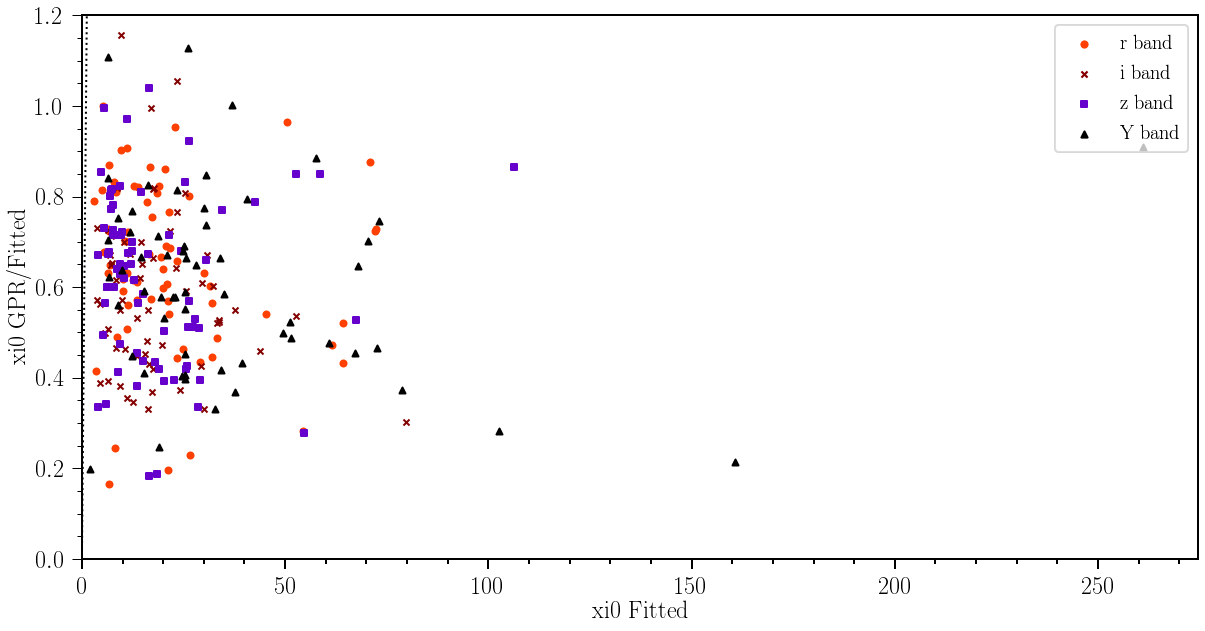

1.204111723500793


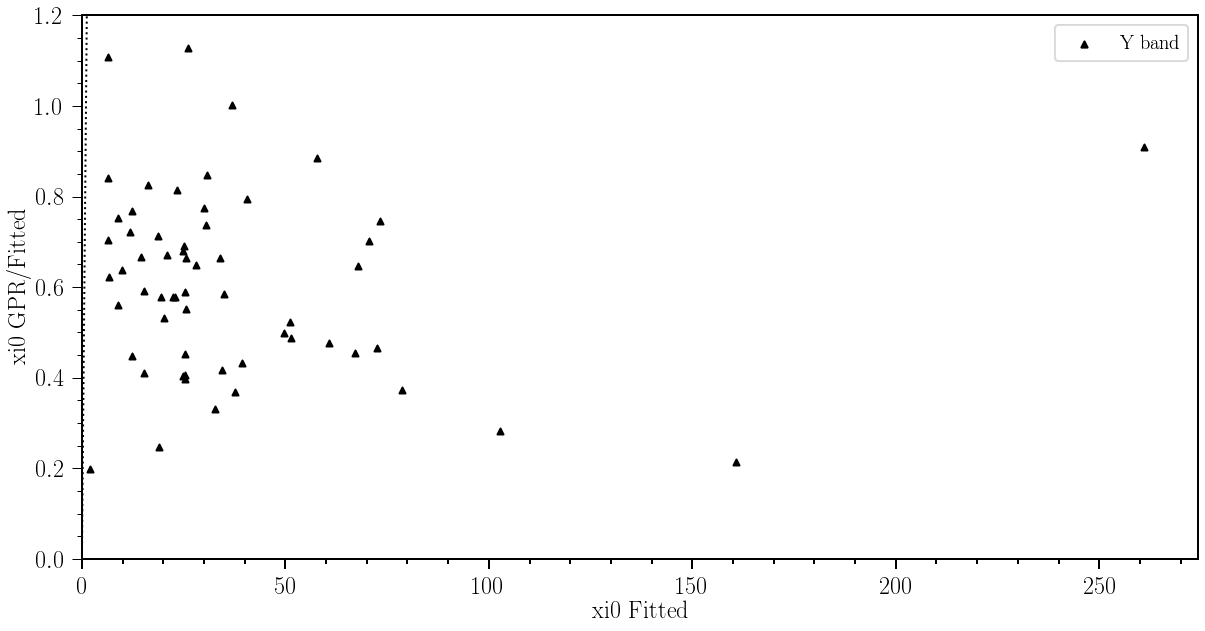

In [28]:
def fit_final(
    AP,
    passband,
    annotate=False,
    xlim=(0, None),
    ylim=(0, 1.1),
    save=None
        ):
    framealpha = 0.5

    fig = plt.figure(figsize=(20, 10))

    bandHandles = []
    red = []
    for band in plotGPR.DES_PASSBANDS:

        # Check if the current band in the loop is one of the bands in the list passband.
        if band not in passband:
            continue

        # If there are no exposures for that band in AP, then skip it.
        if len(AP.expNums[band]) == 0:
            continue
            
        red.extend(u.Quantity(AP.xi0_GPR[band])/u.Quantity(AP.xi0_GPR_fC[band]))
        plt.scatter(
            AP.xi0_GPR_fC[band], u.Quantity(AP.xi0_GPR[band])/u.Quantity(AP.xi0_GPR_fC[band]),
            color=plotGPR.DES_COLORS[band],
            marker=plotGPR.DES_MARKERS[band]
        )
        
        bandHandle = plt.scatter(
            -1, 0,
            alpha=1,
            color=plotGPR.DES_COLORS[band],
            marker=plotGPR.DES_MARKERS[band],
            label=f"{band} band")
        bandHandles.append(bandHandle)
        
    print(1 / np.mean(red))
        
    bandLegend = plt.legend(
        handles=bandHandles,
        loc="upper right",
        framealpha=framealpha)
    plt.gca().add_artist(bandLegend)
    
    plt.ylim(ylim)
    plt.xlim(xlim)

    plt.plot((0, 40), (0, 40), "k:")
    plt.xlabel("xi0 Fitted")
    plt.ylabel("xi0 GPR/Fitted")


    if save is not None:
        plt.savefig(save)
    plt.show()

fit_final(AP, ["r", "i", "z", "Y"], xlim=(0, None), ylim=(0, 1.2))
fit_final(AP, ["Y"], xlim=(0, None), ylim=(0, 1.2))
# fit_final(AP, ["g", "r", "i", "z", "Y"])